In [1]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import matplotlib.pyplot as plt

from PIL import Image

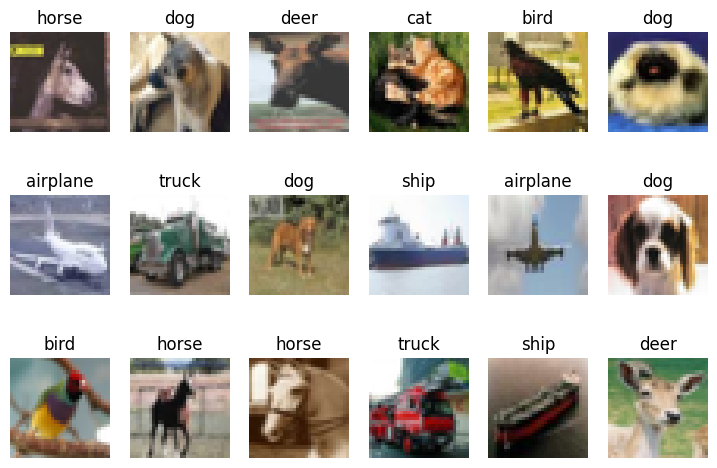

Single image size: 32 x 32
Number of channels: 3


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

cifar10_classes = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

w, h, c = X_train[0].shape
print(f"Single image size: {w} x {h}\nNumber of channels: {c}")

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
max_val = X_train.max()
X_train_norm = X_train / max_val
X_test_norm = X_test / max_val

In [5]:
model = Sequential([
    Input((w, h, c)),
    Conv2D(filters=16, kernel_size=3, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(128, activation='elu'),
    Dropout(0.5),
    Dense(64, activation='elu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2025-02-05 13:41:19.670312: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-02-05 13:41:19.670330: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-05 13:41:19.670333: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-05 13:41:19.670352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-05 13:41:19.670365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,034 (2.57 MB)

 Trainable params: 673,034 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
BATCH_SIZE = 256
EPOCHS = 10

with tf.device("/GPU:0"):
    history = model.fit(X_train_norm, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_norm, y_test_cat))

Epoch 1/10


2025-02-05 13:41:20.984594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.2467 - loss: 2.0642 - val_accuracy: 0.4566 - val_loss: 1.5040
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.4542 - loss: 1.5024 - val_accuracy: 0.5908 - val_loss: 1.1543
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.5312 - loss: 1.3208 - val_accuracy: 0.6396 - val_loss: 1.0591
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.5717 - loss: 1.2223 - val_accuracy: 0.6425 - val_loss: 1.0234
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6012 - loss: 1.1437 - val_accuracy: 0.6693 - val_loss: 0.9420
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6160 - loss: 1.1105 - val_accuracy: 0.6751 - val_loss: 0.9362
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6264 - loss: 1.0776 - val_accuracy: 0.6755 - val_loss: 0.9210
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6501 - loss: 1.0331 - val_accurac

In [7]:
loss_history = pd.DataFrame({
    'train': history.history['loss'],
    'test': history.history['val_loss']
})
px.line(loss_history, title='Loss')

In [8]:
accuracy_history = pd.DataFrame({
    'train': history.history['accuracy'],
    'test':  history.history['val_accuracy']
})
px.line(accuracy_history, title='Accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


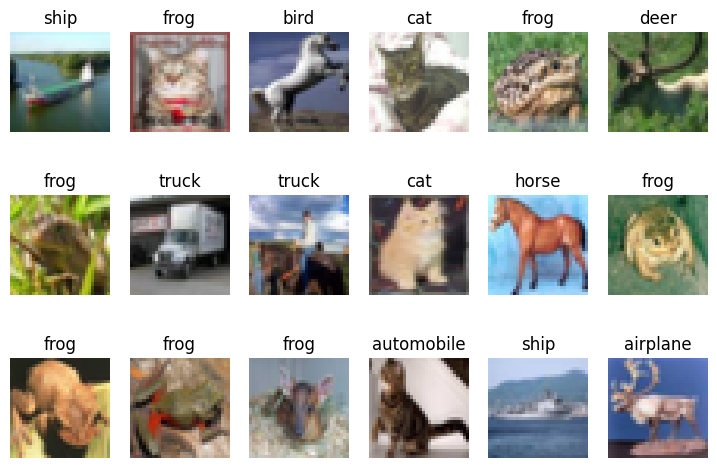

In [10]:
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_pred))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        ax.set_title(cifar10_classes[y_pred[random_index]])
plt.show()